In [188]:
# Mason Cooper
import pandas as pd
titanic_data = pd.read_csv("./titanic.csv")

#create a dataframe
df = pd.DataFrame(titanic_data, columns = ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"])
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [189]:
print(df.dtypes)
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"])

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [190]:
df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]
df["Sex"].replace(["male", "female"],[1,0],inplace=True)
print(df)

     Pclass  Sex   Age  SibSp  Parch     Fare  Survived
0         3    1  22.0      1      0   7.2500         0
1         1    0  38.0      1      0  71.2833         1
2         3    0  26.0      0      0   7.9250         1
3         1    0  35.0      1      0  53.1000         1
4         3    1  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         0
887       1    0  19.0      0      0  30.0000         1
888       3    0   NaN      1      2  23.4500         0
889       1    1  26.0      0      0  30.0000         1
890       3    1  32.0      0      0   7.7500         0

[891 rows x 7 columns]


In [191]:
print(df.dtypes)

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object


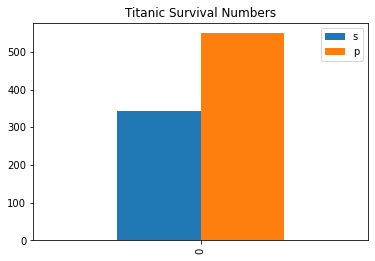

In [193]:
survivorc = df['Survived'].sum()
totalp = len(df['Pclass'])
perishc = totalp - survivorc

bdf = pd.DataFrame({'s':[survivorc], 'p':[perishc]})
ax = bdf.plot.bar(y={'s', 'p'}, title="Titanic Survival Numbers")

In [197]:
print(df.mean())
print(df[df['Survived']==0].mean())
print(df[df['Survived']==1].mean())

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64
Pclass       2.531876
Sex          0.852459
Age         30.626179
SibSp        0.553734
Parch        0.329690
Fare        22.117887
Survived     0.000000
dtype: float64
Pclass       1.950292
Sex          0.318713
Age         28.343690
SibSp        0.473684
Parch        0.464912
Fare        48.395408
Survived     1.000000
dtype: float64


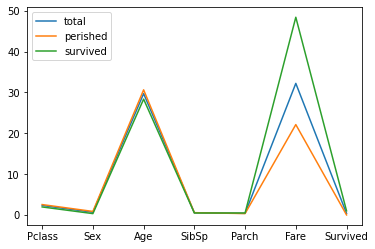

In [208]:
dfl = pd.DataFrame({
'total': df.mean(axis=0),
'perished': df[df['Survived']==0].mean(axis=0),
'survived': df[df['Survived']==1].mean(axis=0)
})
lines = dfl.plot.line()

<AxesSubplot:title={'center':'fare'}>

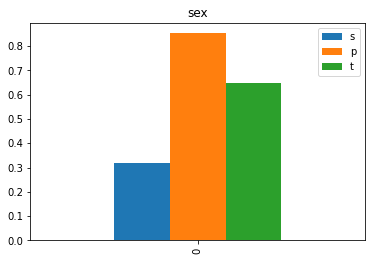

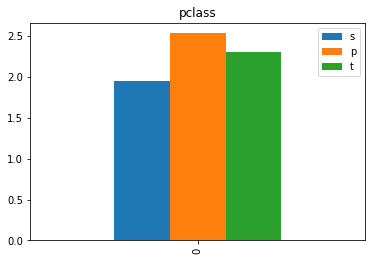

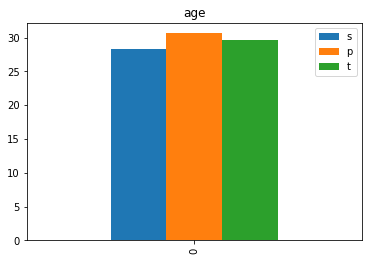

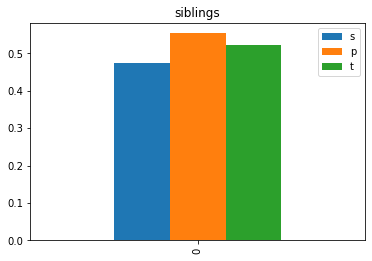

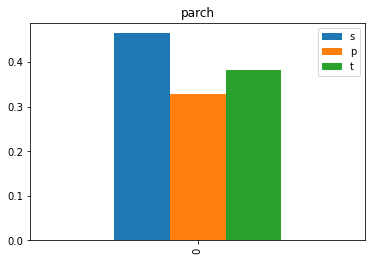

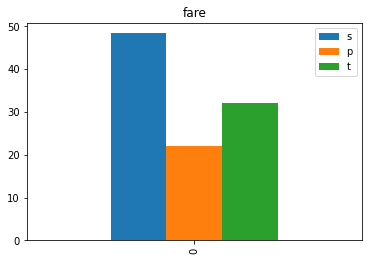

In [165]:
dfsex = pd.DataFrame({'t': [df["Sex"].mean(axis=0)], 's':[df["Sex"][df['Survived']==1].mean(axis=0)], 'p':[df["Sex"][df['Survived']==0].mean(axis=0)]})
dfsex.plot.bar(y={'t', 's', 'p'}, title="sex")

dfpclass = pd.DataFrame({'t': [df["Pclass"].mean(axis=0)], 's':[df["Pclass"][df['Survived']==1].mean(axis=0)], 'p':[df["Pclass"][df['Survived']==0].mean(axis=0)]})
dfpclass.plot.bar(y={'t', 's', 'p'}, title="pclass")

dfpclass = pd.DataFrame({'t': [df["Age"].mean(axis=0)], 's':[df["Age"][df['Survived']==1].mean(axis=0)], 'p':[df["Age"][df['Survived']==0].mean(axis=0)]})
dfpclass.plot.bar(y={'t', 's', 'p'}, title="age")

dfpclass = pd.DataFrame({'t': [df["SibSp"].mean(axis=0)], 's':[df["SibSp"][df['Survived']==1].mean(axis=0)], 'p':[df["SibSp"][df['Survived']==0].mean(axis=0)]})
dfpclass.plot.bar(y={'t', 's', 'p'}, title="siblings")

dfpclass = pd.DataFrame({'t': [df["Parch"].mean(axis=0)], 's':[df["Parch"][df['Survived']==1].mean(axis=0)], 'p':[df["Parch"][df['Survived']==0].mean(axis=0)]})
dfpclass.plot.bar(y={'t', 's', 'p'}, title="parch")

dfpclass = pd.DataFrame({'t': [df["Fare"].mean(axis=0)], 's':[df["Fare"][df['Survived']==1].mean(axis=0)], 'p':[df["Fare"][df['Survived']==0].mean(axis=0)]})
dfpclass.plot.bar(y={'t', 's', 'p'}, title="fare")

In [166]:
df = pd.DataFrame(titanic_data, columns = ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"])
df["Sex"].replace(["male", "female"],[1,0],inplace=True)

print(df["Age"].corr(df["Survived"]))
print(df["PassengerId"].corr(df["Survived"]))
print(df["Pclass"].corr(df["Survived"]))
print(df["Sex"].corr(df["Survived"]))
print(df["SibSp"].corr(df["Survived"]))
print(df["Parch"].corr(df["Survived"]))
print(df["Fare"].corr(df["Survived"]))

-0.07722109457217764
-0.005006660767066487
-0.3384810359610147
-0.5433513806577551
-0.03532249888573558
0.08162940708348365
0.2573065223849623


<AxesSubplot:xlabel='Age', ylabel='Fare'>

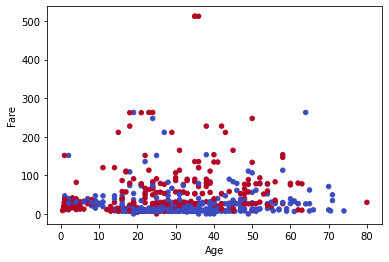

In [167]:
fareage = pd.DataFrame({'Fare': df['Fare'], 'Age': df['Age'], 'Survived': df['Survived']})
fareage.plot.scatter(x = 'Age', y = 'Fare',  c='Survived', colormap="coolwarm", colorbar=False)